In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
%matplotlib inline

In [115]:
df = pd.read_csv('algerian_clean_dataset.csv')
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [116]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [117]:
df = df.drop(['day', 'month', 'year','index'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [118]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [119]:
## encoding -0,1
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [120]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [121]:
## Independent and Dependent Feature
X = df.drop('FWI',axis=1)
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [122]:
y = df['FWI']
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [123]:
## Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

In [124]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [125]:
## Feature Selection based on correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664106,-0.284285,-0.332493,0.690245,0.494657,0.398345,0.605002,0.473480,0.532604,0.272439
RH,-0.664106,1.000000,0.216906,0.216026,-0.645477,-0.399374,-0.218684,-0.682805,-0.345577,-0.447035,-0.395779
Ws,-0.284285,0.216906,1.000000,0.198263,-0.164421,-0.001988,0.051831,0.034626,0.020510,-0.015691,-0.120777
Rain,-0.332493,0.216026,0.198263,1.000000,-0.545232,-0.287017,-0.296831,-0.351914,-0.298460,-0.365089,-0.019413
FFMC,0.690245,-0.645477,-0.164421,-0.545232,1.000000,0.597528,0.500046,0.751666,0.586264,0.759940,0.180944
DMC,0.494657,-0.399374,-0.001988,-0.287017,0.597528,1.000000,0.867837,0.683809,0.981026,0.578138,0.192492
DC,0.398345,-0.218684,0.051831,-0.296831,0.500046,0.867837,1.000000,0.502461,0.937199,0.501794,-0.080379
ISI,0.605002,-0.682805,0.034626,-0.351914,0.751666,0.683809,0.502461,1.000000,0.648213,0.755806,0.258948
BUI,0.473480,-0.345577,0.020510,-0.298460,0.586264,0.981026,0.937199,0.648213,1.000000,0.580292,0.087681
Classes,0.532604,-0.447035,-0.015691,-0.365089,0.759940,0.578138,0.501794,0.755806,0.580292,1.000000,0.125855


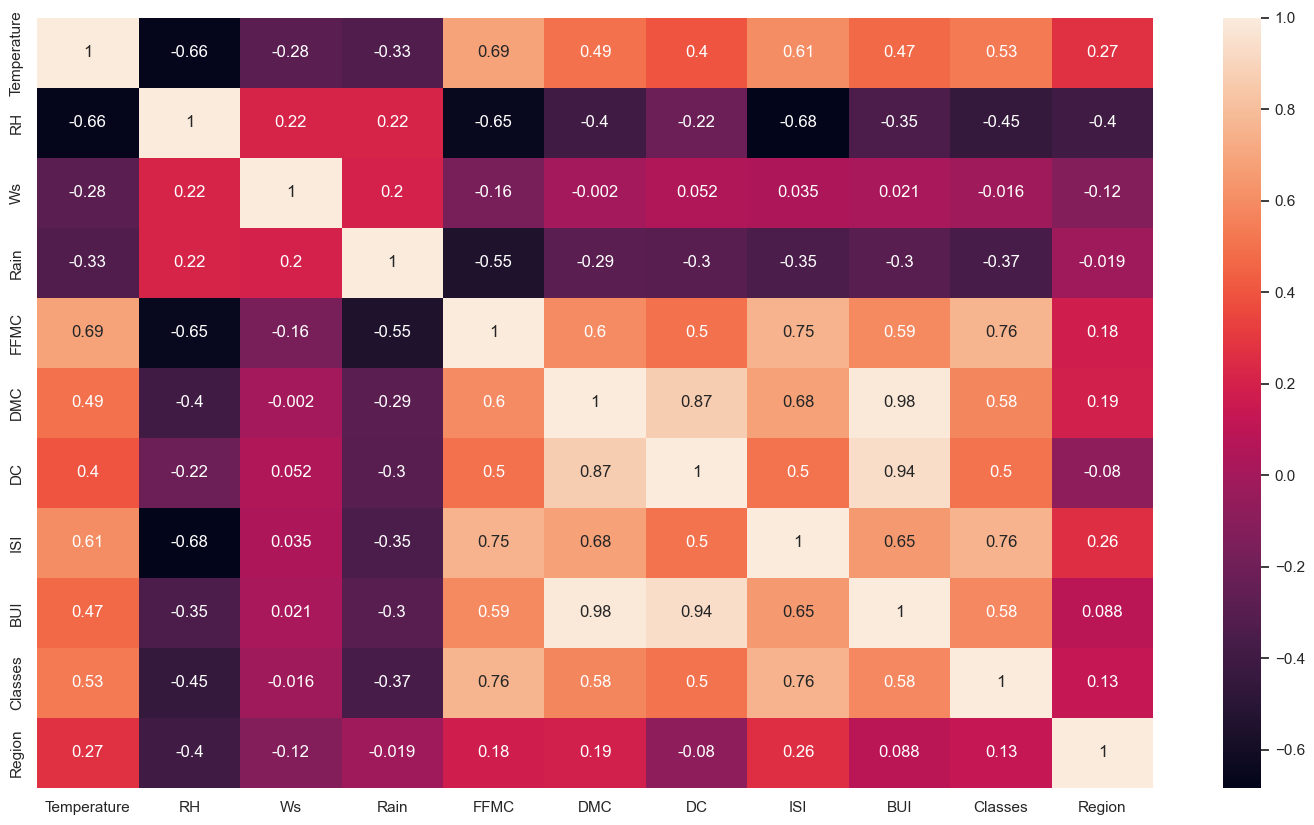

In [126]:
## check for multicollinearity 
plt.figure(figsize=(18,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [127]:
def correlation (dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [128]:
## threshold -- domain expertise 
correlation_featuers = correlation(X_train,0.85)

In [129]:
## drop features when correlation ismore than 0.85
X_train.drop(correlation_featuers,axis=1,inplace=True)
X_test.drop(correlation_featuers,axis=1,inplace=True)
X_test.shape,X_train.shape


((61, 9), (182, 9))

## feature scaling or standardlization 

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [131]:
X_train_scaled

array([[-1.20979237,  1.14254681,  0.88586306, ..., -0.72823871,
        -1.12915898, -0.96755889],
       [-0.34065206,  0.86712493, -0.88586306, ..., -0.80391788,
        -1.12915898, -0.96755889],
       [-0.34065206,  1.07369134,  0.88586306, ...,  0.00332656,
         0.88561489, -0.96755889],
       ...,
       [-0.6303655 , -0.71655088, -0.17717261, ..., -0.82914426,
        -1.12915898,  1.03352882],
       [ 0.52848824, -0.30341806,  0.88586306, ...,  0.83579738,
         0.88561489,  1.03352882],
       [ 1.10791512, -0.50998447, -0.88586306, ..., -0.24893733,
         0.88561489, -0.96755889]])

## box plots to understand effect of Standard scaler 


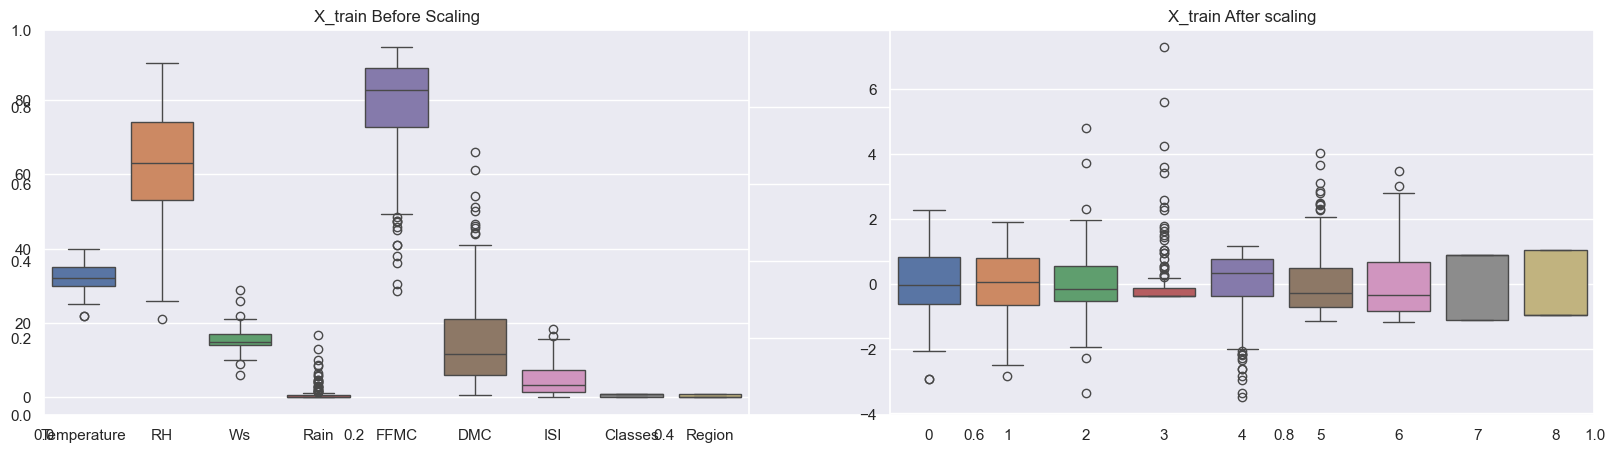

In [132]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After scaling")
plt.show()

# Linear Regression Model

In [133]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [134]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [135]:
y_pred =linear.predict(X_test_scaled)

In [136]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
rscore = r2_score(y_test,y_pred)
print(f"mae :{mae} \nrsore:{rscore}")

mae :0.875092143209326 
rsore:0.9243229068752971


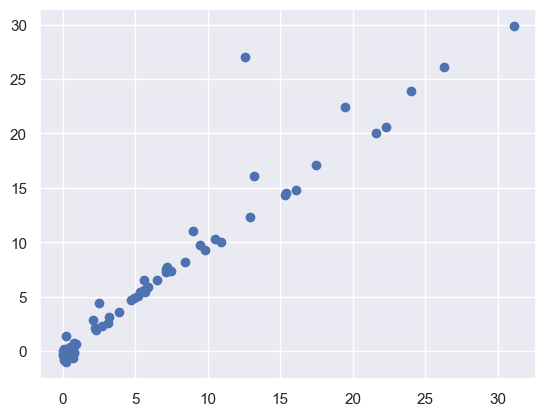

In [137]:
plt.scatter(y_test,y_pred)
plt.show()

## lasso Regression 

mae :1.247995140192621 
rscore:0.9264617747702033


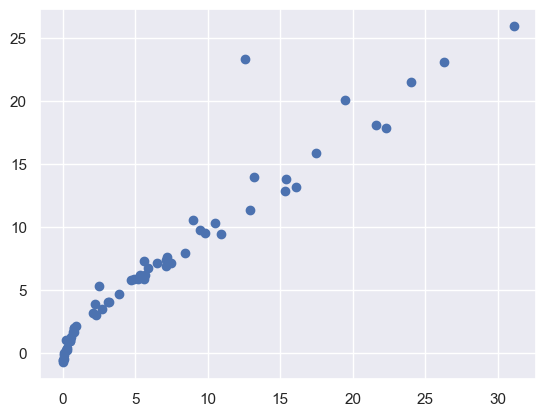

In [138]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
las = Lasso()
las.fit(X_train_scaled,y_train)
y_pred = las.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
rsore = r2_score(y_test,y_pred)
print(f"mae :{mae} \nrscore:{rsore}")
plt.scatter(y_test,y_pred)
plt.show()

## ridge regression model

mae :0.8773513226893257 
rscore:0.9264043521062867


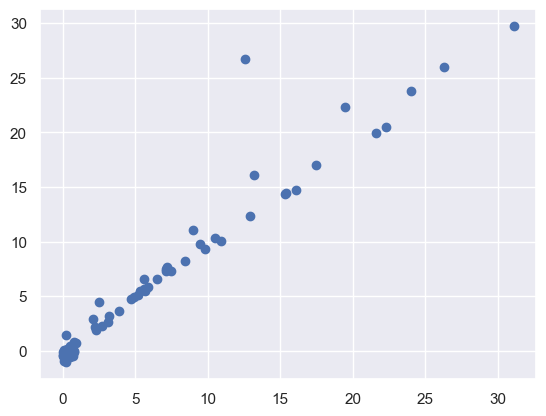

In [139]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
rid = Ridge()
rid.fit(X_train_scaled,y_train)
y_pred = rid.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
rsore = r2_score(y_test,y_pred)
print(f"mae :{mae} \nrscore:{rsore}")
plt.scatter(y_test,y_pred)
plt.show()

# Elasticnet Regression 

mae :0.8773513226893257 
rscore:0.9264043521062867


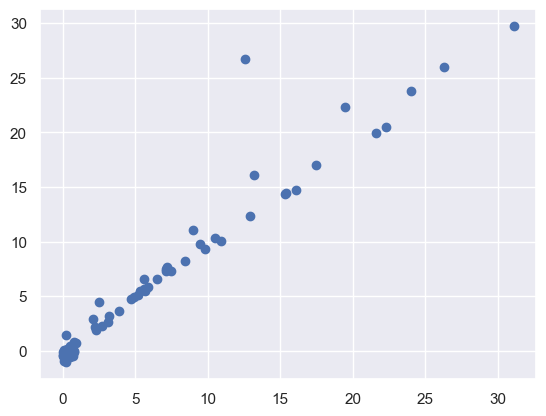

In [140]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
eln = ElasticNet()
eln.fit(X_train_scaled,y_train)
y_pred = rid.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
rsore = r2_score(y_test,y_pred)
print(f"mae :{mae} \nrscore:{rsore}")
plt.scatter(y_test,y_pred)
plt.show()